### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import pathlib

from sklearn.metrics import f1_score
from joblib import load

import sys
sys.path.append("../utils")
from split_utils import get_features_data
from train_utils import get_dataset, get_X_y_data
from evaluate_utils import evaluate_model_cm, evaluate_model_score

### Load necessary data

In [2]:
# specify results directory
results_dir = pathlib.Path("evaluations/")
results_dir.mkdir(parents=True, exist_ok=True)

# load features data from indexes and features dataframe
data_split_path = pathlib.Path("../1.split_data/indexes/data_split_indexes.tsv")
data_split_indexes = pd.read_csv(data_split_path, sep="\t", index_col=0)
features_dataframe_path = pathlib.Path("../0.download_data/data/training_data.csv.gz")
features_dataframe = get_features_data(features_dataframe_path)

### Evaluate best model

In [3]:
model_dir = pathlib.Path("../2.train_model/models/")
log_reg_model_path = pathlib.Path(f"{model_dir}/log_reg_model.joblib")
log_reg_model = load(log_reg_model_path)

### Evaluate with training data

In [4]:
training_data = get_dataset(features_dataframe, data_split_indexes, "train")
training_data

,Mitocheck_Phenotypic_Class,Object_Outline,Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Frame,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,...,efficientnet_1270,efficientnet_1271,efficientnet_1272,efficientnet_1273,efficientnet_1274,efficientnet_1275,efficientnet_1276,efficientnet_1277,efficientnet_1278,efficientnet_1279
0,Large,[[396 595]\n [395 596]\n [394 596]\n [393 596]...,397.288288,618.558559,LT0010_27,173,83,1,LT0010_27_173,LT0010_27/LT0010_27_173_83.tif,...,1.527232,-0.388696,-0.715081,-0.939058,-0.079103,1.966414,18.714635,0.061156,2.639598,-0.085996
1,Large,[[361 563]\n [360 564]\n [359 564]\n [358 564]...,359.535714,585.062500,LT0010_27,173,83,1,LT0010_27_173,LT0010_27/LT0010_27_173_83.tif,...,-0.483285,-1.355129,-0.857182,-0.934520,0.724273,2.254263,-0.564988,1.629091,-0.606195,-0.747432
3,Large,[[923 515]\n [922 516]\n [921 516]\n [920 516]...,934.568807,534.385321,LT0013_38,42,75,1,LT0013_38_42,LT0013_38/LT0013_38_42_75.tif,...,-1.424769,-0.863939,-0.582677,-0.228617,0.426065,1.906163,0.193329,0.909489,-1.723110,0.955596
4,Large,[[483 96]\n [482 97]\n [481 97]\n [480 98]...,481.007143,121.978571,LT0013_38,42,75,1,LT0013_38_42,LT0013_38/LT0013_38_42_75.tif,...,0.693119,-0.581144,-0.256527,-1.401117,-0.357608,2.607508,6.506821,-1.335764,-0.264039,0.978577
5,Large,[[456 803]\n [455 804]\n [454 804]\n [453 804]...,465.732824,822.656489,LT0013_38,42,95,1,LT0013_38_42,LT0013_38/LT0013_38_42_95.tif,...,1.221643,0.427448,1.270162,-0.513263,2.415464,1.093042,0.218068,-1.291372,0.512568,1.728560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,OutOfFocus,[[480 884]\n [479 885]\n [478 885]\n [477 885]...,477.566667,900.411111,LT0601_01,217,49,1,LT0601_01_217,LT0601_01/LT0601_01_217_49.tif,...,0.020656,8.914342,3.211937,-1.092754,-0.879064,-1.162240,-1.896239,-0.418936,0.504933,1.216141
2911,OutOfFocus,[[413 338]\n [412 339]\n [411 339]\n [410 339]...,411.508929,361.410714,LT0601_01,217,49,1,LT0601_01_217,LT0601_01/LT0601_01_217_49.tif,...,-0.724141,4.936666,2.227179,-1.458934,-0.774605,-1.679045,-2.429998,-0.826404,0.730059,1.286466
2912,OutOfFocus,[[797 520]\n [796 521]\n [795 521]\n [794 522]...,808.740741,536.296296,LT0601_01,217,49,1,LT0601_01_217,LT0601_01/LT0601_01_217_49.tif,...,-1.463249,4.504158,4.272579,-1.529108,-0.932259,-0.898132,-3.123627,-0.719680,-0.425281,1.687259
2913,OutOfFocus,[[736 898]\n [735 899]\n [734 899]\n [733 899]...,732.185567,916.804124,LT0601_01,217,49,1,LT0601_01_217,LT0601_01/LT0601_01_217_49.tif,...,-0.755542,5.010617,6.062460,-1.249060,-1.027013,-1.500677,-2.383565,-0.655265,0.690708,-0.007728


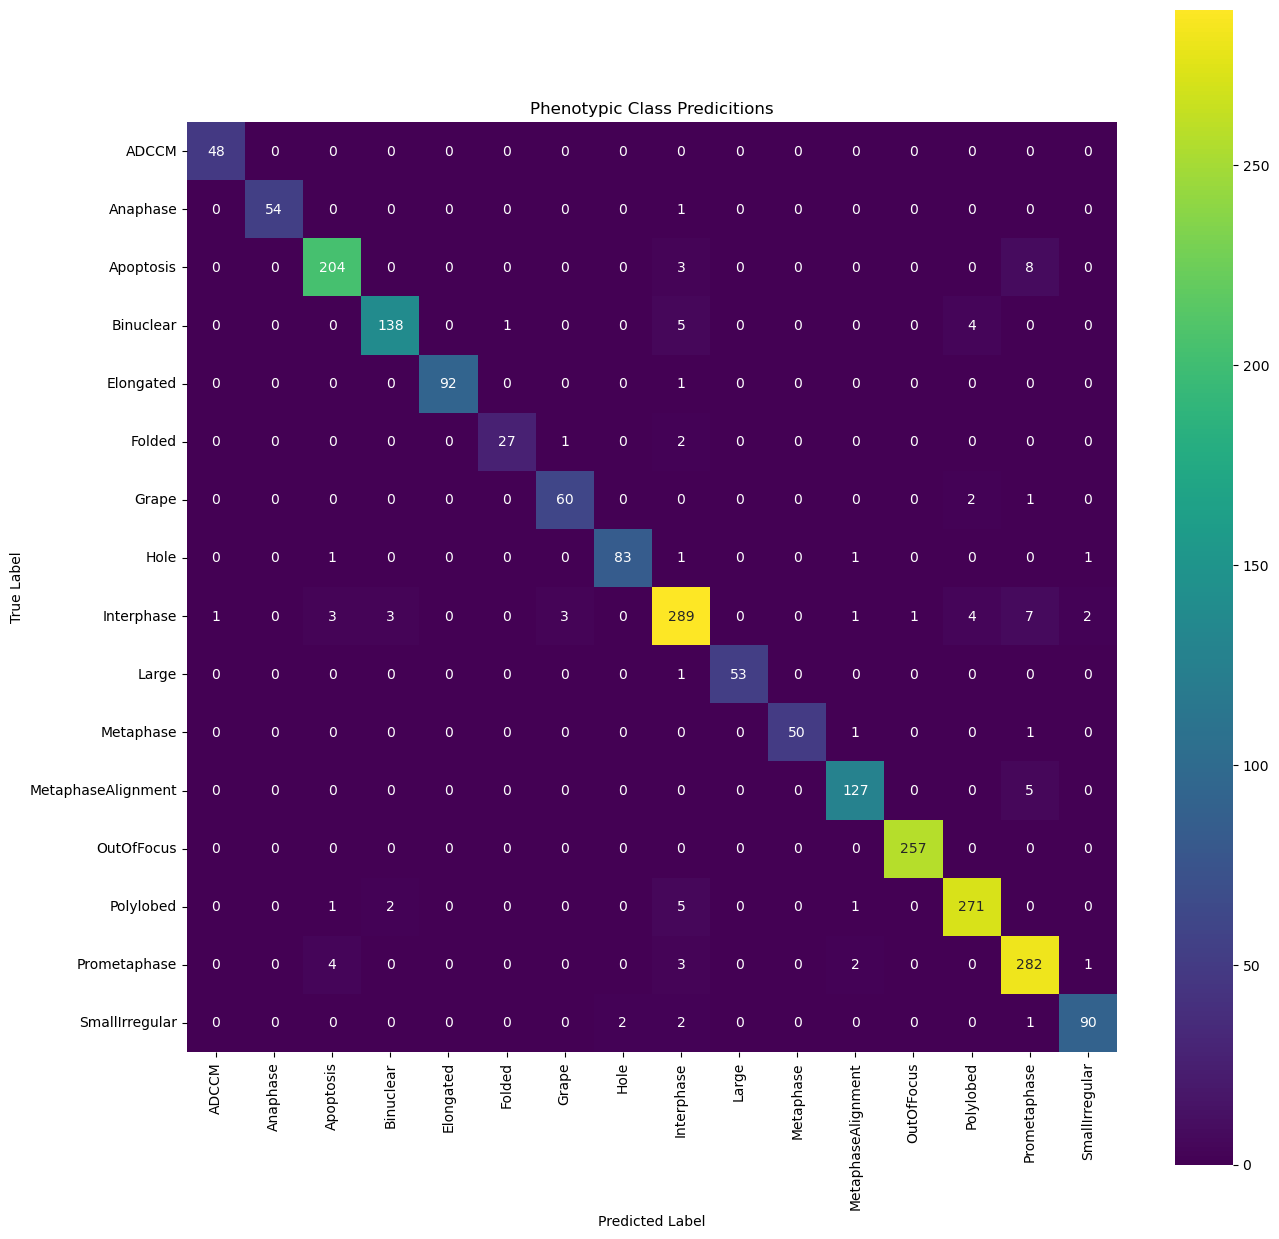

In [5]:
y_train, y_train_pred = evaluate_model_cm(log_reg_model, training_data)

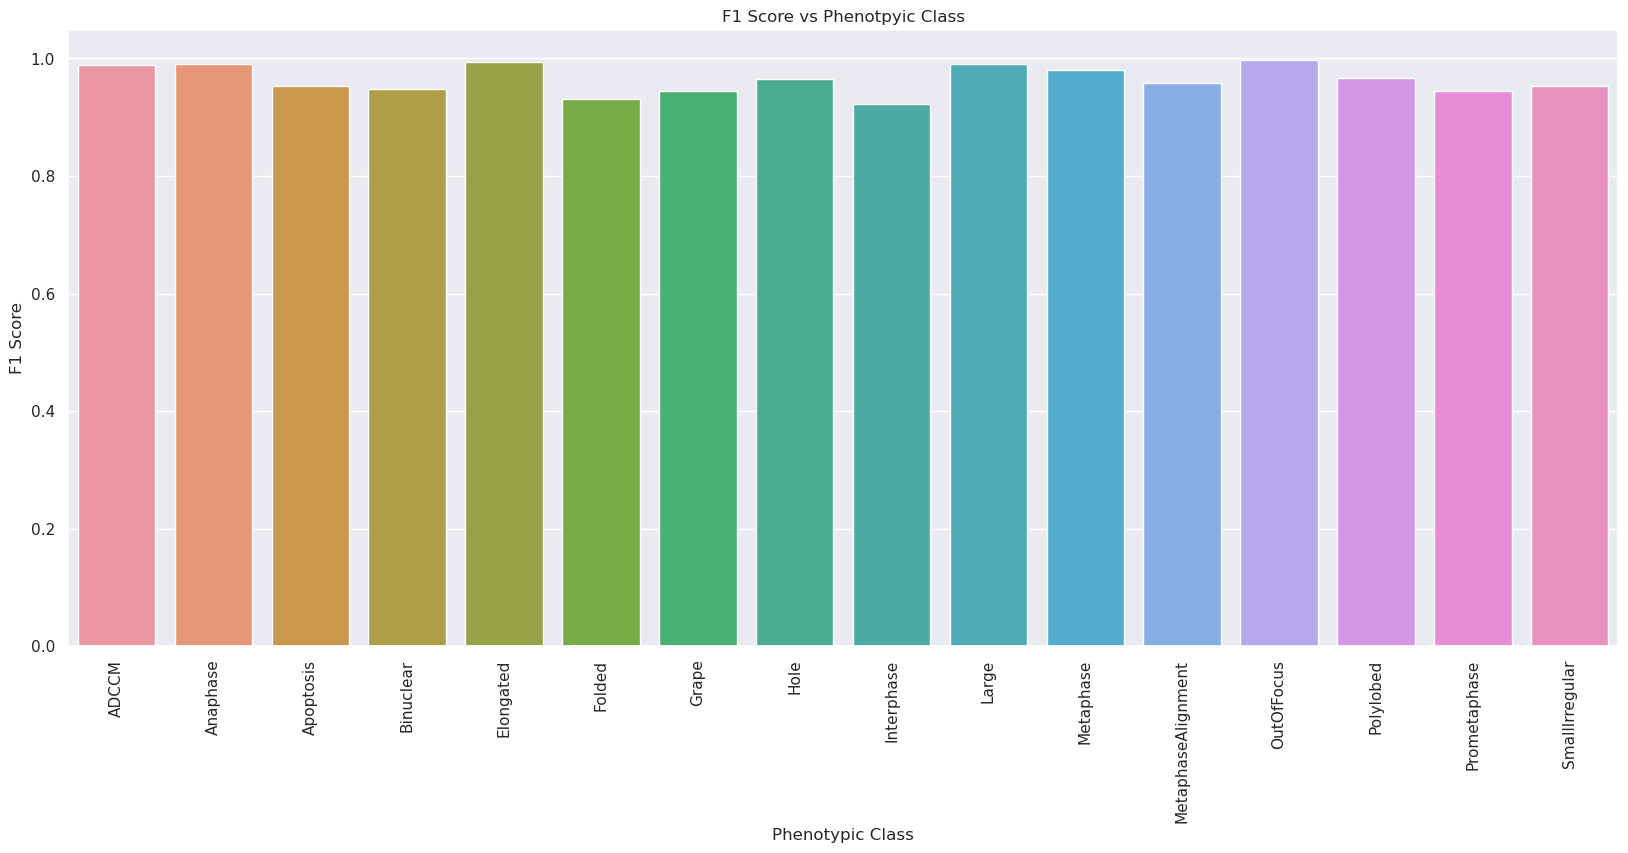

In [6]:
evaluate_model_score(log_reg_model, training_data)

### Evaluate with testing data

In [7]:
testing_data = get_dataset(features_dataframe, data_split_indexes, "test")
testing_data

,Mitocheck_Phenotypic_Class,Object_Outline,Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Frame,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,...,efficientnet_1270,efficientnet_1271,efficientnet_1272,efficientnet_1273,efficientnet_1274,efficientnet_1275,efficientnet_1276,efficientnet_1277,efficientnet_1278,efficientnet_1279
1253,ADCCM,[[410 608]\n [409 609]\n [408 609]\n [407 610]...,414.222222,622.833333,LT0090_33,383,84,1,LT0090_33_383,LT0090_33/LT0090_33_383_84.tif,...,1.436521,-0.677514,-0.540527,-1.378689,0.329079,2.712783,-0.721491,-2.195427,0.254397,0.636342
1227,ADCCM,[[805 103]\n [804 104]\n [803 104]\n [802 104]...,795.710526,115.289474,LT0038_08,250,54,1,LT0038_08_250,LT0038_08/LT0038_08_250_54.tif,...,0.883501,-1.092440,-0.562212,-0.949487,-0.629693,-0.851447,0.917996,-0.329619,0.540201,0.292748
1283,ADCCM,[[599 584]\n [598 585]\n [597 585]\n [596 585]...,600.638889,595.138889,LT0090_33,383,92,1,LT0090_33_383,LT0090_33/LT0090_33_383_92.tif,...,0.703589,-0.134545,-0.588811,-1.491103,0.208396,1.796303,-0.658502,0.171776,-0.237163,0.330199
1264,ADCCM,[[550 138]\n [549 139]\n [548 139]\n [547 139]...,552.380952,154.476190,LT0090_33,383,84,1,LT0090_33_383,LT0090_33/LT0090_33_383_84.tif,...,0.224132,-0.695176,0.164413,-1.552022,-1.114027,1.391672,0.186897,-1.100810,0.791511,0.610785
1263,ADCCM,[[1168 42]\n [1168 43]\n [1168 44]\n [11...,1171.958333,53.652778,LT0090_33,383,84,1,LT0090_33_383,LT0090_33/LT0090_33_383_84.tif,...,0.640791,0.474895,0.206932,-0.352868,-0.194320,-0.872785,0.428311,-0.259502,0.066888,0.865349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,SmallIrregular,[[431 378]\n [430 379]\n [429 379]\n [428 380]...,434.841270,389.301587,LT0044_02,139,73,1,LT0044_02_139,LT0044_02/LT0044_02_139_73.tif,...,-0.677080,-0.470802,-0.091536,1.882214,0.364451,1.387548,-1.192805,0.030486,0.622990,-1.300985
1445,SmallIrregular,[[761 436]\n [760 437]\n [759 437]\n [758 437]...,763.435484,446.161290,LT0038_01,245,81,1,LT0038_01_245,LT0038_01/LT0038_01_245_81.tif,...,1.515714,1.217245,-0.119684,-1.435136,1.018344,2.590010,0.421894,-0.941541,0.971566,-0.834229
1469,SmallIrregular,[[231 906]\n [230 907]\n [229 907]\n [228 907]...,235.933333,917.680000,LT0091_30,169,43,1,LT0091_30_169,LT0091_30/LT0091_30_169_43.tif,...,0.925196,4.914313,0.706348,-1.524002,0.319227,0.461813,0.016338,-0.871937,0.548146,1.400788
1472,SmallIrregular,[[499 657]\n [498 658]\n [497 658]\n [496 659]...,501.046154,667.061538,LT0094_01,319,34,1,LT0094_01_319,LT0094_01/LT0094_01_319_34.tif,...,1.174565,2.542224,0.546020,-0.823456,-1.141290,-0.260690,0.512427,0.265541,2.336990,-0.094490


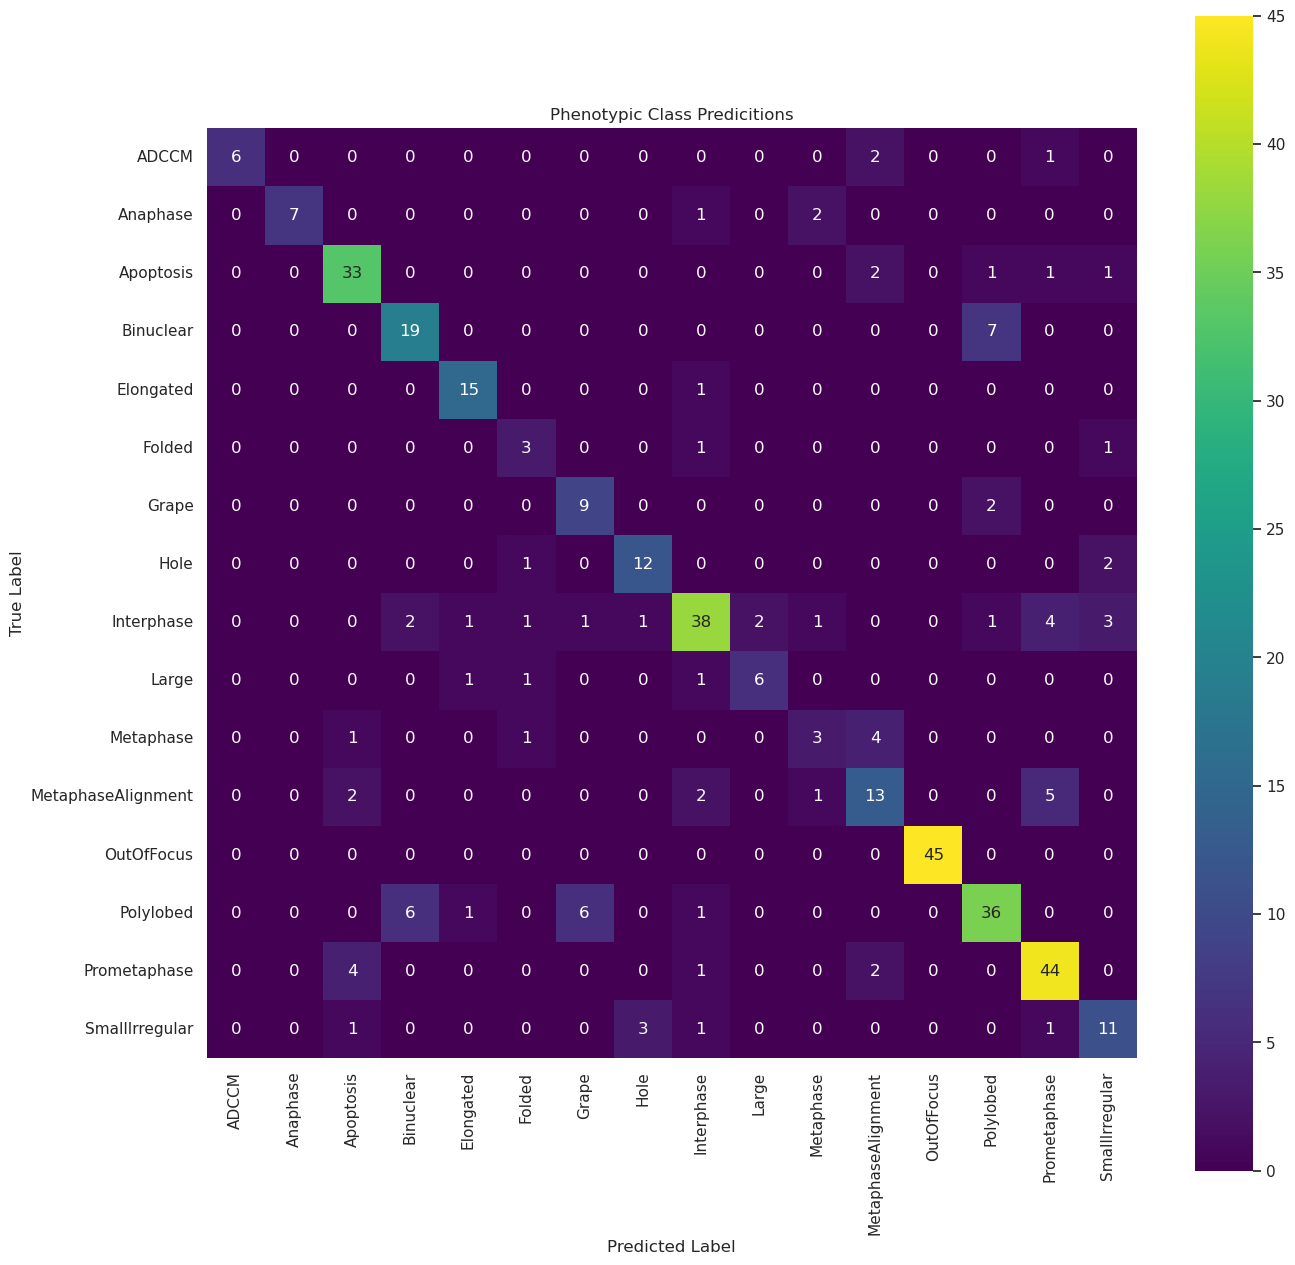

In [8]:
y_test, y_test_pred = evaluate_model_cm(log_reg_model, testing_data)

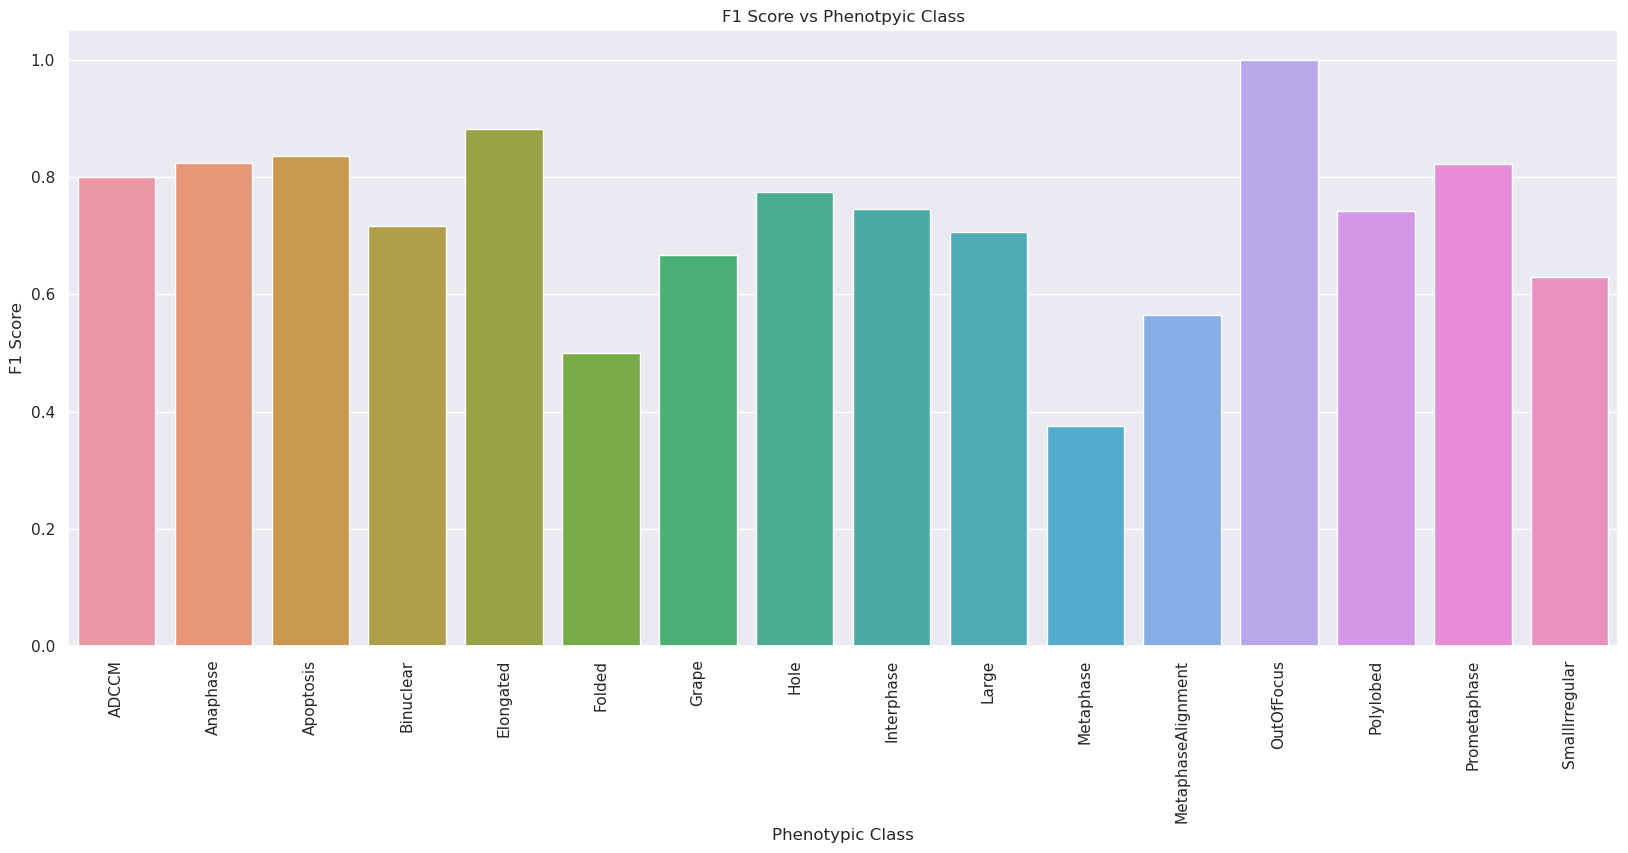

In [9]:
evaluate_model_score(log_reg_model, testing_data)

### Evaluate with holdout data

In [10]:
holdout_data = get_dataset(features_dataframe, data_split_indexes, "holdout")
X_holdout, y_holdout = get_X_y_data(holdout_data)
holdout_data

,Mitocheck_Phenotypic_Class,Object_Outline,Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Frame,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,...,efficientnet_1270,efficientnet_1271,efficientnet_1272,efficientnet_1273,efficientnet_1274,efficientnet_1275,efficientnet_1276,efficientnet_1277,efficientnet_1278,efficientnet_1279
20,Large,[[1100 232]\n [1099 233]\n [1098 233]\n [10...,1094.800000,252.057143,LT0043_48,166,44,1,LT0043_48_166,LT0043_48/LT0043_48_166_44.tif,...,-1.160302,-0.868651,0.028016,-0.690651,0.193001,1.117797,0.021388,0.357098,-1.903595,-0.406782
21,Large,[[1072 89]\n [1071 90]\n [1070 90]\n [10...,1080.476636,102.261682,LT0043_48,166,44,1,LT0043_48_166,LT0043_48/LT0043_48_166_44.tif,...,-1.074039,-0.595306,-0.609685,0.074230,-0.509348,0.089258,-0.252746,-1.221231,-1.436919,-0.424429
22,Large,[[1074 201]\n [1073 202]\n [1072 203]\n [10...,1076.158879,221.654206,LT0043_48,166,44,1,LT0043_48_166,LT0043_48/LT0043_48_166_44.tif,...,-2.038645,-0.715385,-0.439888,0.166977,-0.420772,2.594670,-0.430630,-0.042773,-1.926058,-1.368600
23,Large,[[1037 172]\n [1036 173]\n [1035 173]\n [10...,1039.514563,189.087379,LT0043_48,166,44,1,LT0043_48_166,LT0043_48/LT0043_48_166_44.tif,...,-1.620229,-0.498970,-0.550860,0.078790,-0.857828,1.578457,-0.032018,-2.192005,-0.489154,0.781641
24,Large,[[1002 143]\n [1001 144]\n [1000 144]\n [ 9...,1010.372549,160.176471,LT0043_48,166,44,1,LT0043_48_166,LT0043_48/LT0043_48_166_44.tif,...,-0.794180,-0.623397,-0.291645,-0.373956,0.735967,2.676713,0.664770,-0.666388,-1.547283,0.443833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243,Hole,[[903 508]\n [902 509]\n [901 509]\n [900 509]...,899.634409,524.559140,LT0138_03,127,62,1,LT0138_03_127,LT0138_03/LT0138_03_127_62.tif,...,0.094480,0.347512,-0.312107,-0.721902,2.536843,1.245504,-0.690938,2.461109,1.350218,-1.041693
2244,Hole,[[843 515]\n [842 516]\n [841 516]\n [840 517]...,842.813333,529.506667,LT0138_03,127,62,1,LT0138_03_127,LT0138_03/LT0138_03_127_62.tif,...,1.514228,0.411384,1.038210,-1.039545,-0.297066,1.979448,0.186589,-0.531741,1.139451,-0.868675
2310,Anaphase,[[948 931]\n [947 932]\n [946 932]\n [945 933]...,952.693878,937.755102,LT0138_03,127,30,1,LT0138_03_127,LT0138_03/LT0138_03_127_30.tif,...,0.915879,1.035389,-0.358182,0.715213,-0.058950,3.067269,0.540945,-1.189437,1.892399,-0.023744
2311,Anaphase,[[946 909]\n [945 910]\n [944 910]\n [943 911]...,951.705882,915.078431,LT0138_03,127,30,1,LT0138_03_127,LT0138_03/LT0138_03_127_30.tif,...,0.542372,1.143044,-0.391808,0.424308,-0.261683,3.316081,0.273609,-1.067718,1.974766,-0.242177


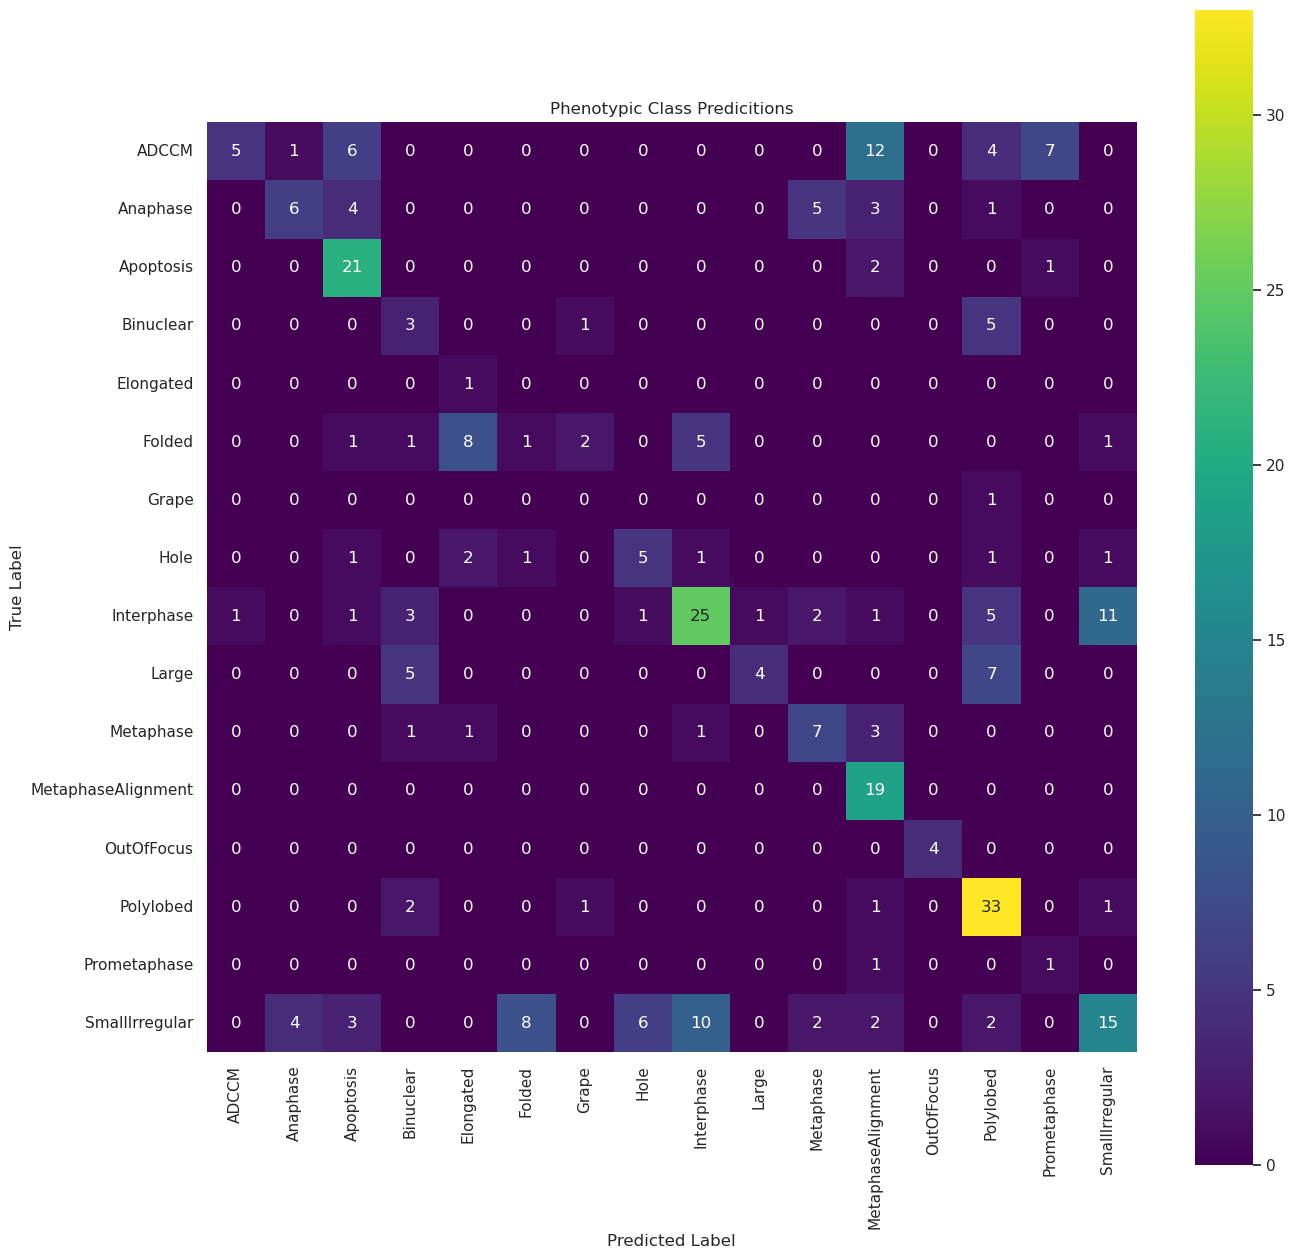

In [11]:
y_holdout, y_holdout_pred = evaluate_model_cm(log_reg_model, holdout_data)

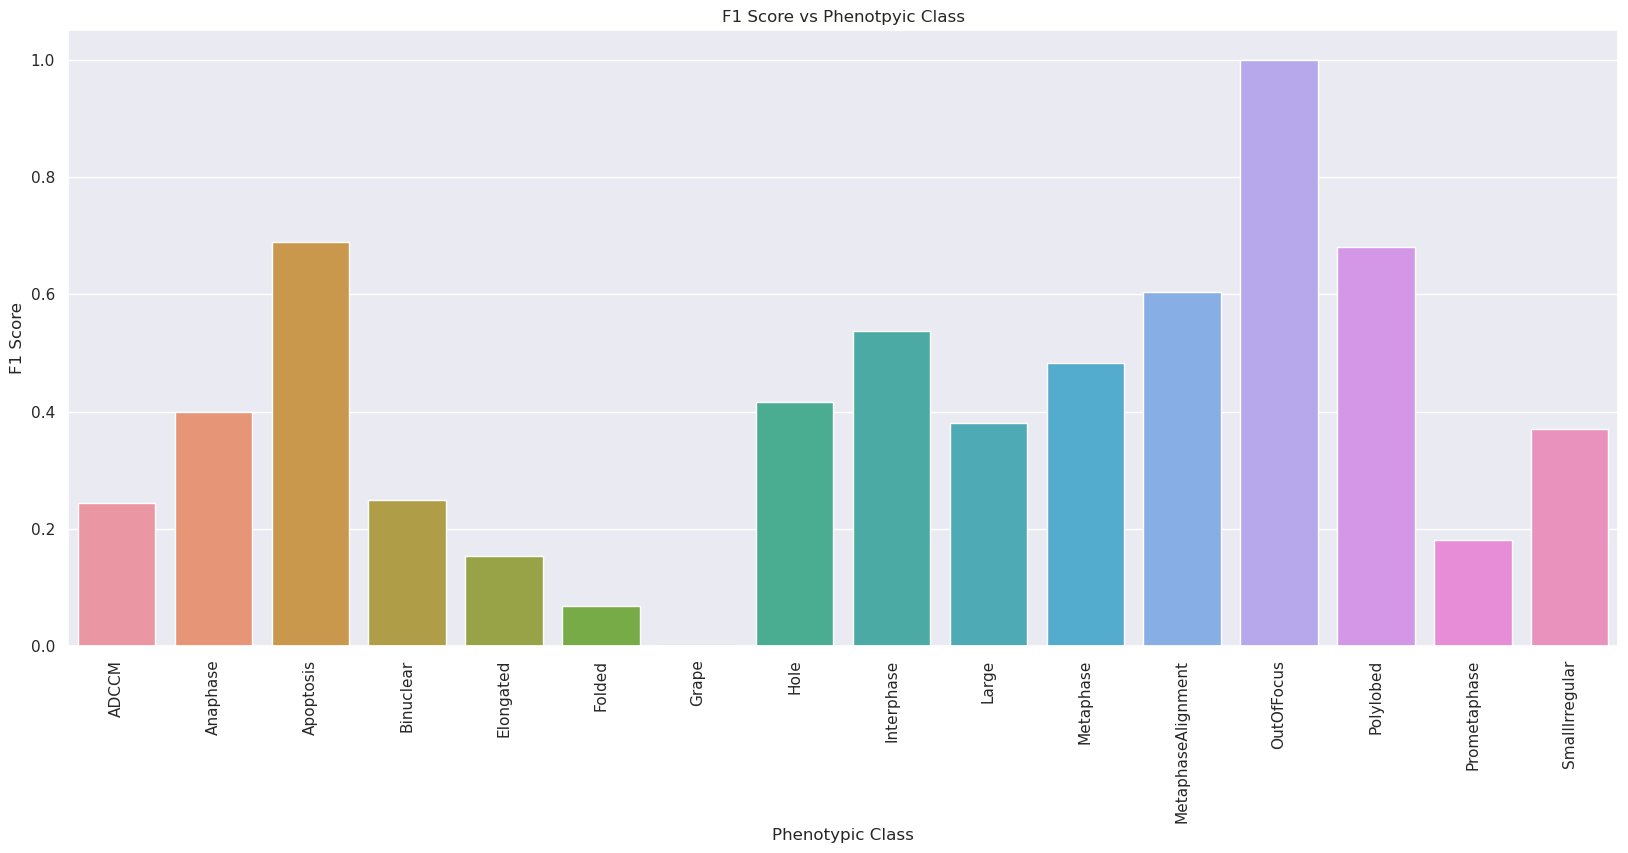

In [12]:
evaluate_model_score(log_reg_model, holdout_data)

### Save trained model predicitions

In [13]:
predictions = []

predictions.append(y_train)
predictions.append(y_train_pred)

predictions.append(y_test)
predictions.append(y_test_pred)

predictions.append(y_holdout)
predictions.append(y_holdout_pred)

predictions = pd.DataFrame(predictions)
predictions.index = ["y_train", "y_train_pred", "y_test", "y_test_pred", "y_holdout", "y_holdout_pred"]
predictions.to_csv(f"{results_dir}/model_predictions.tsv", sep="\t")

### Evaluate shuffled baseline model

In [14]:
shuffled_baseline_log_reg_model_path = pathlib.Path(f"{model_dir}/shuffled_baseline_log_reg_model.joblib")
shuffled_baseline_log_reg_model = load(shuffled_baseline_log_reg_model_path) 

### Evaluate with training data

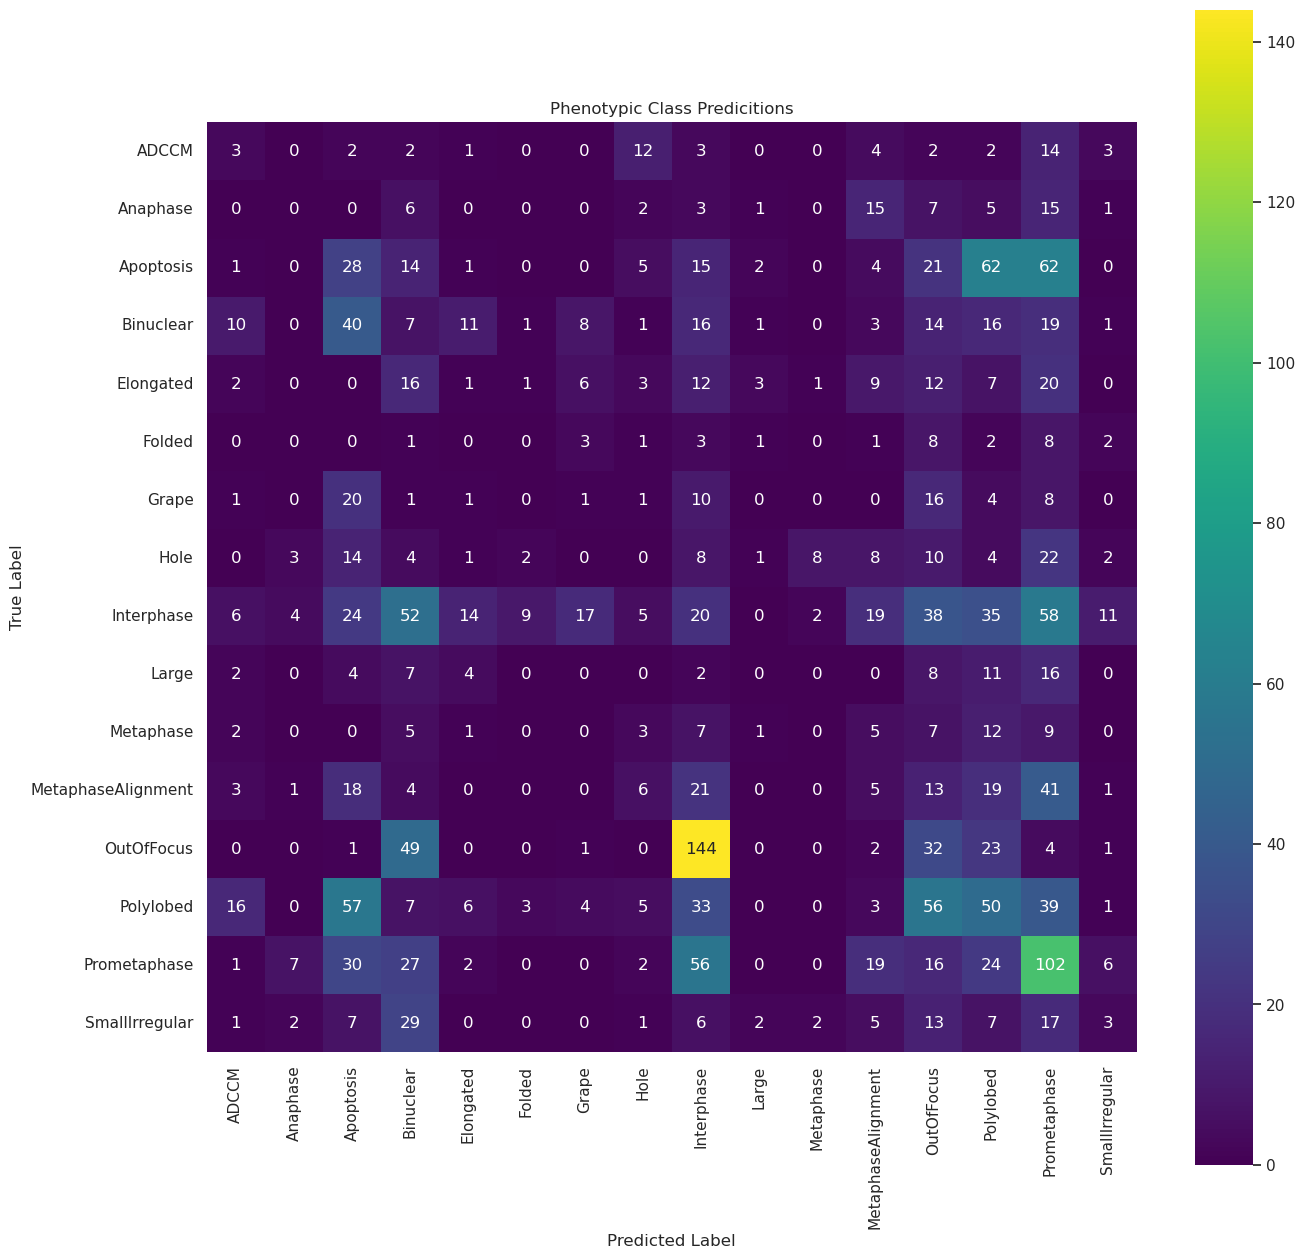

In [15]:
y_train, y_train_pred = evaluate_model_cm(shuffled_baseline_log_reg_model, training_data)

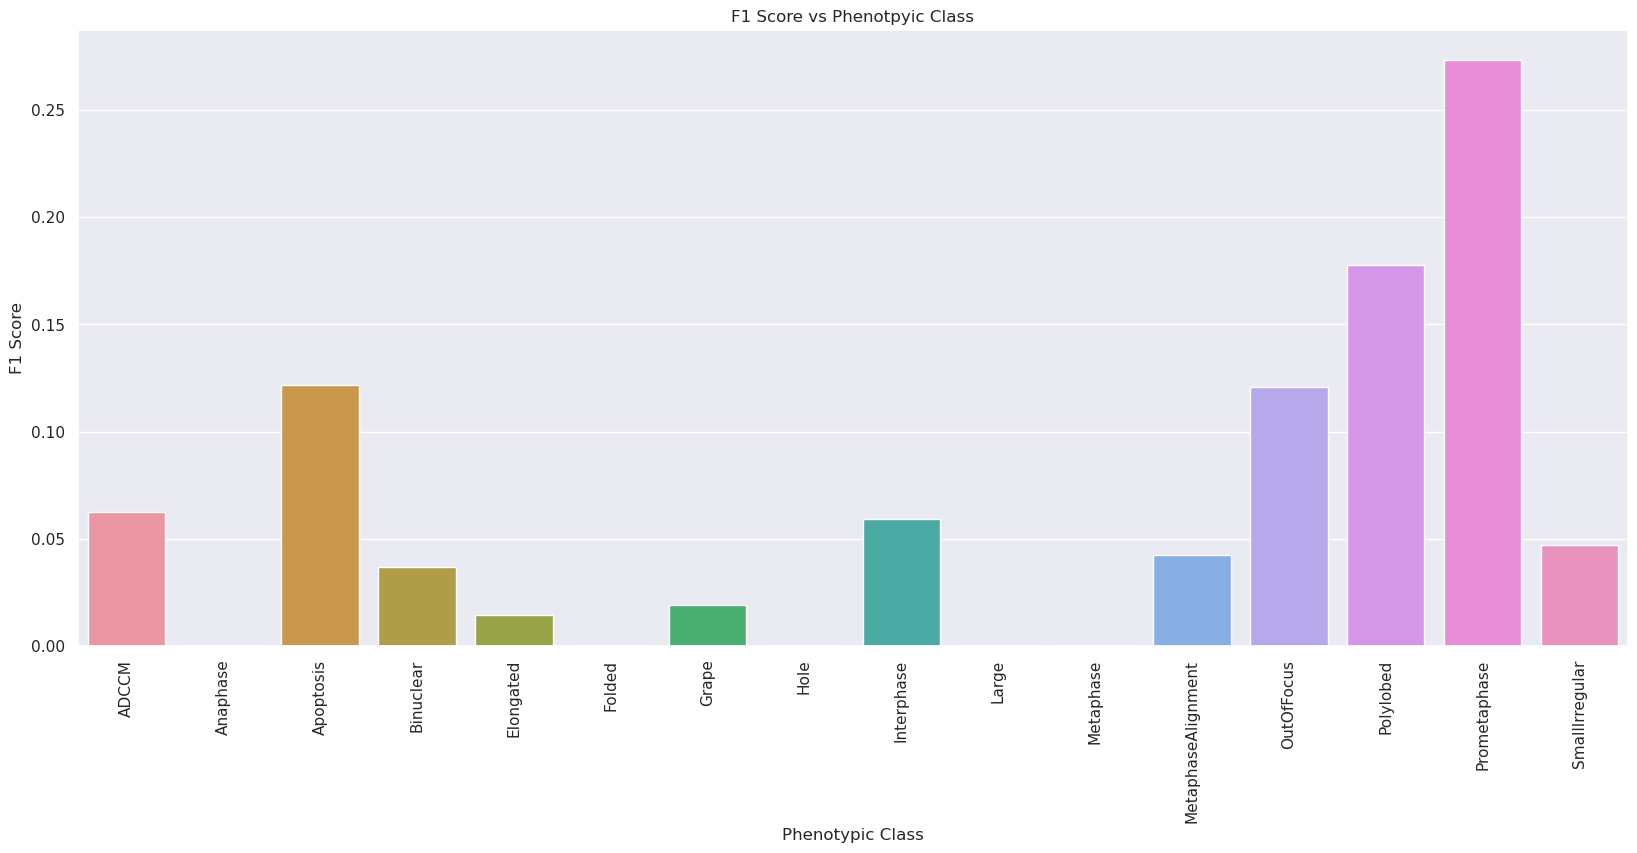

In [16]:
evaluate_model_score(shuffled_baseline_log_reg_model, training_data)

### Evaluate with testing data

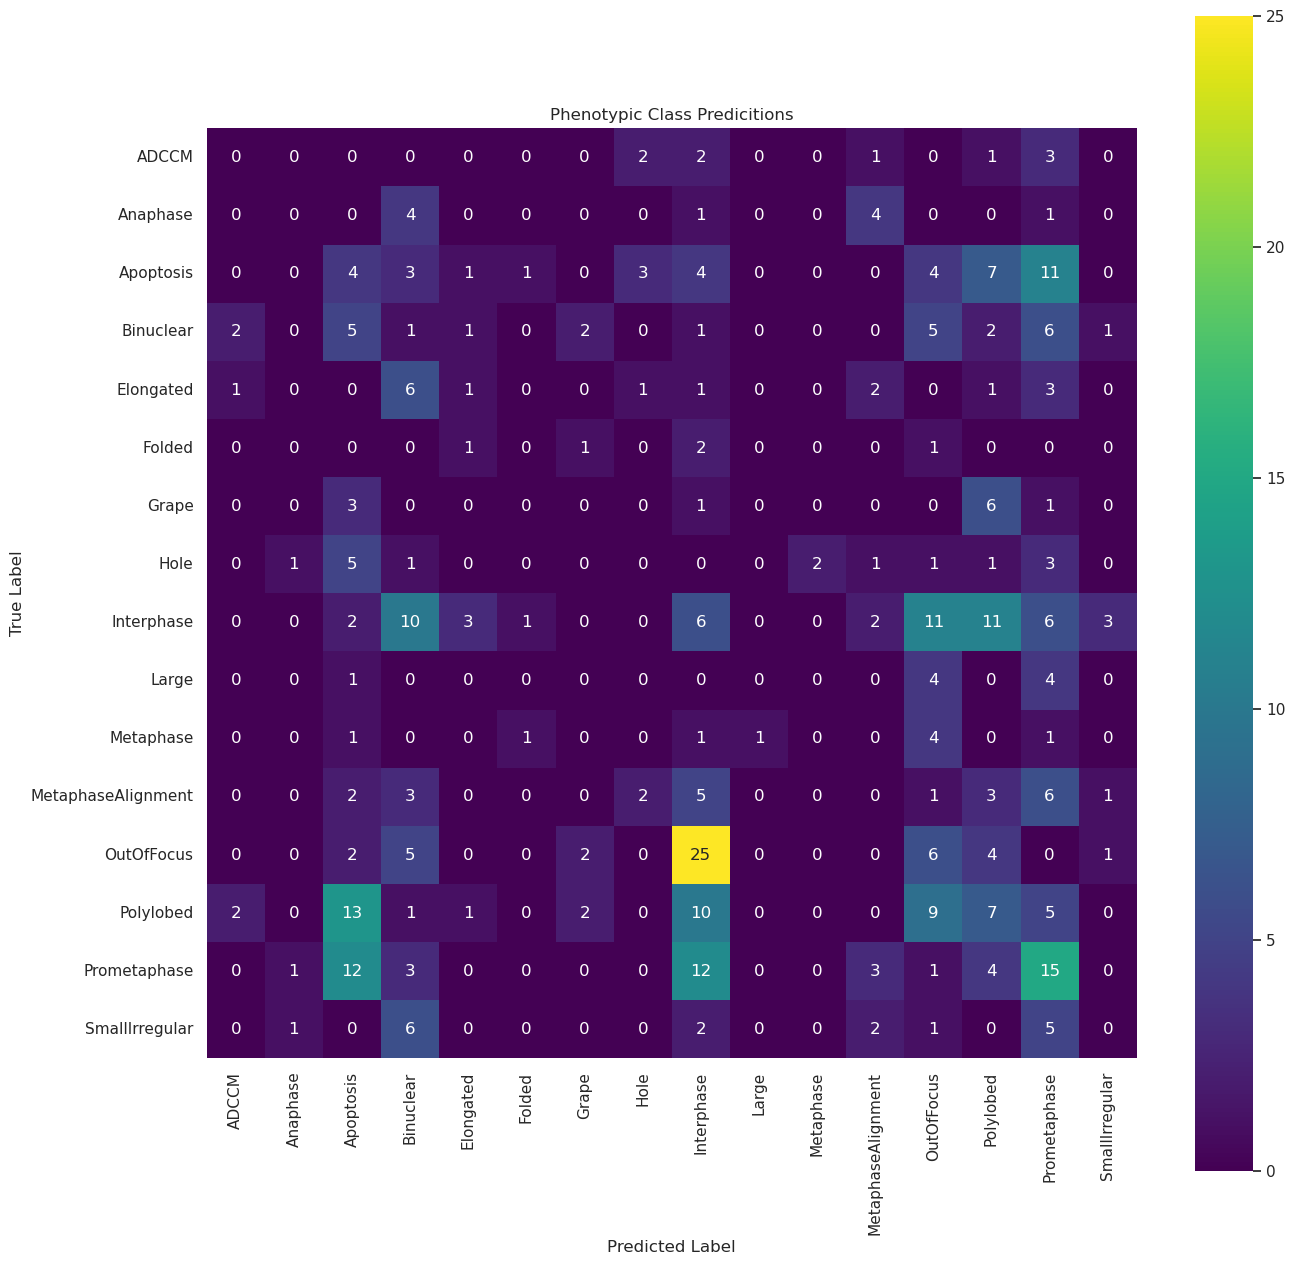

In [17]:
y_test, y_test_pred = evaluate_model_cm(shuffled_baseline_log_reg_model, testing_data)

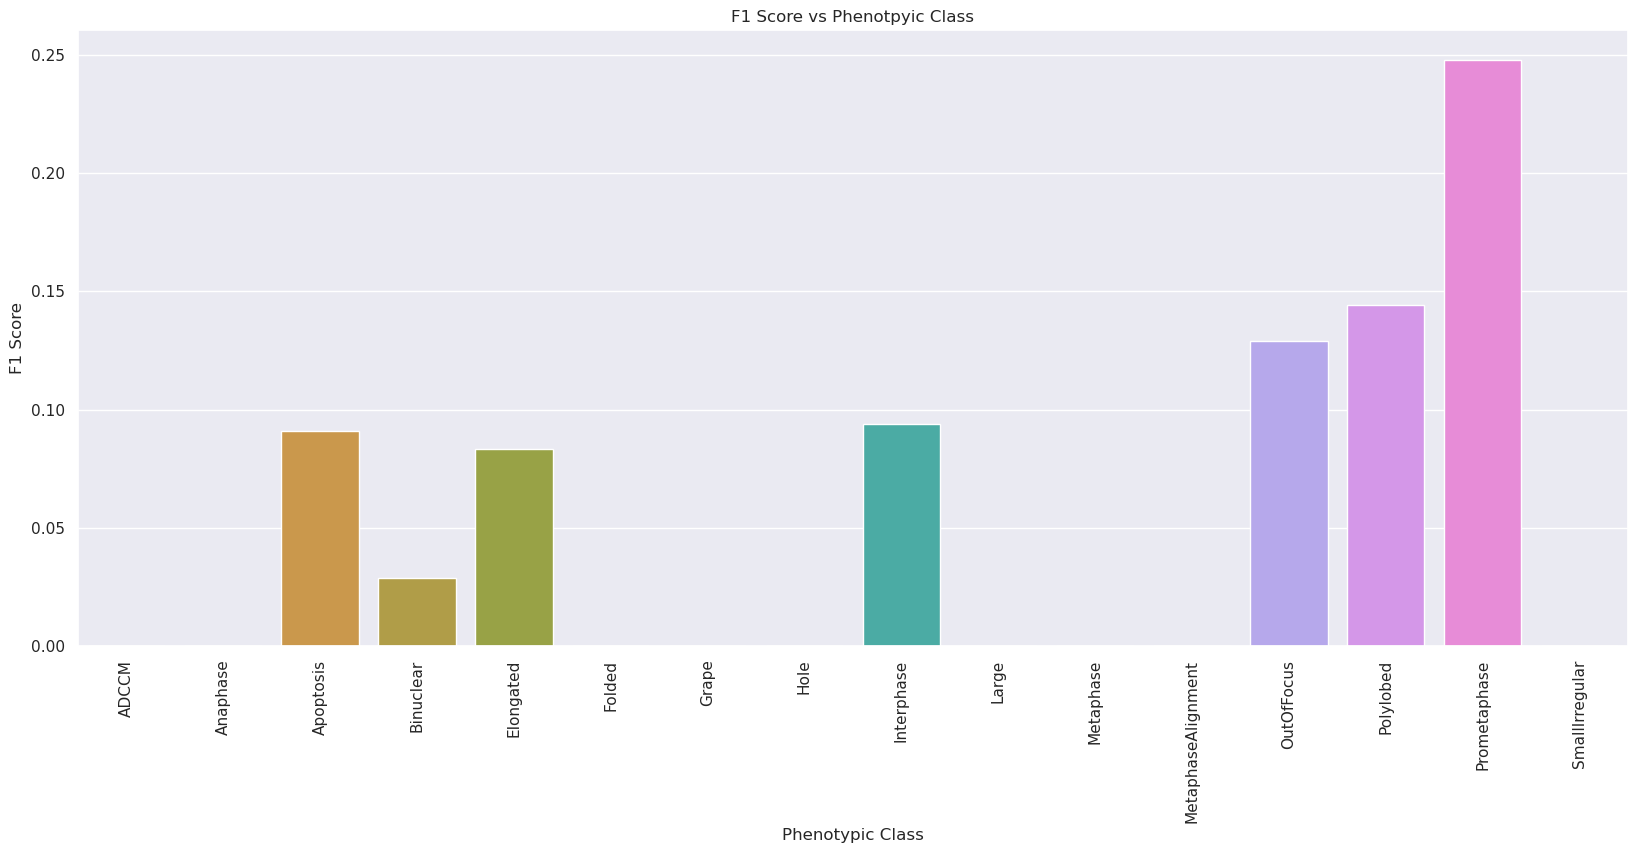

In [18]:
evaluate_model_score(shuffled_baseline_log_reg_model, testing_data)

### Evaluate with holdout data

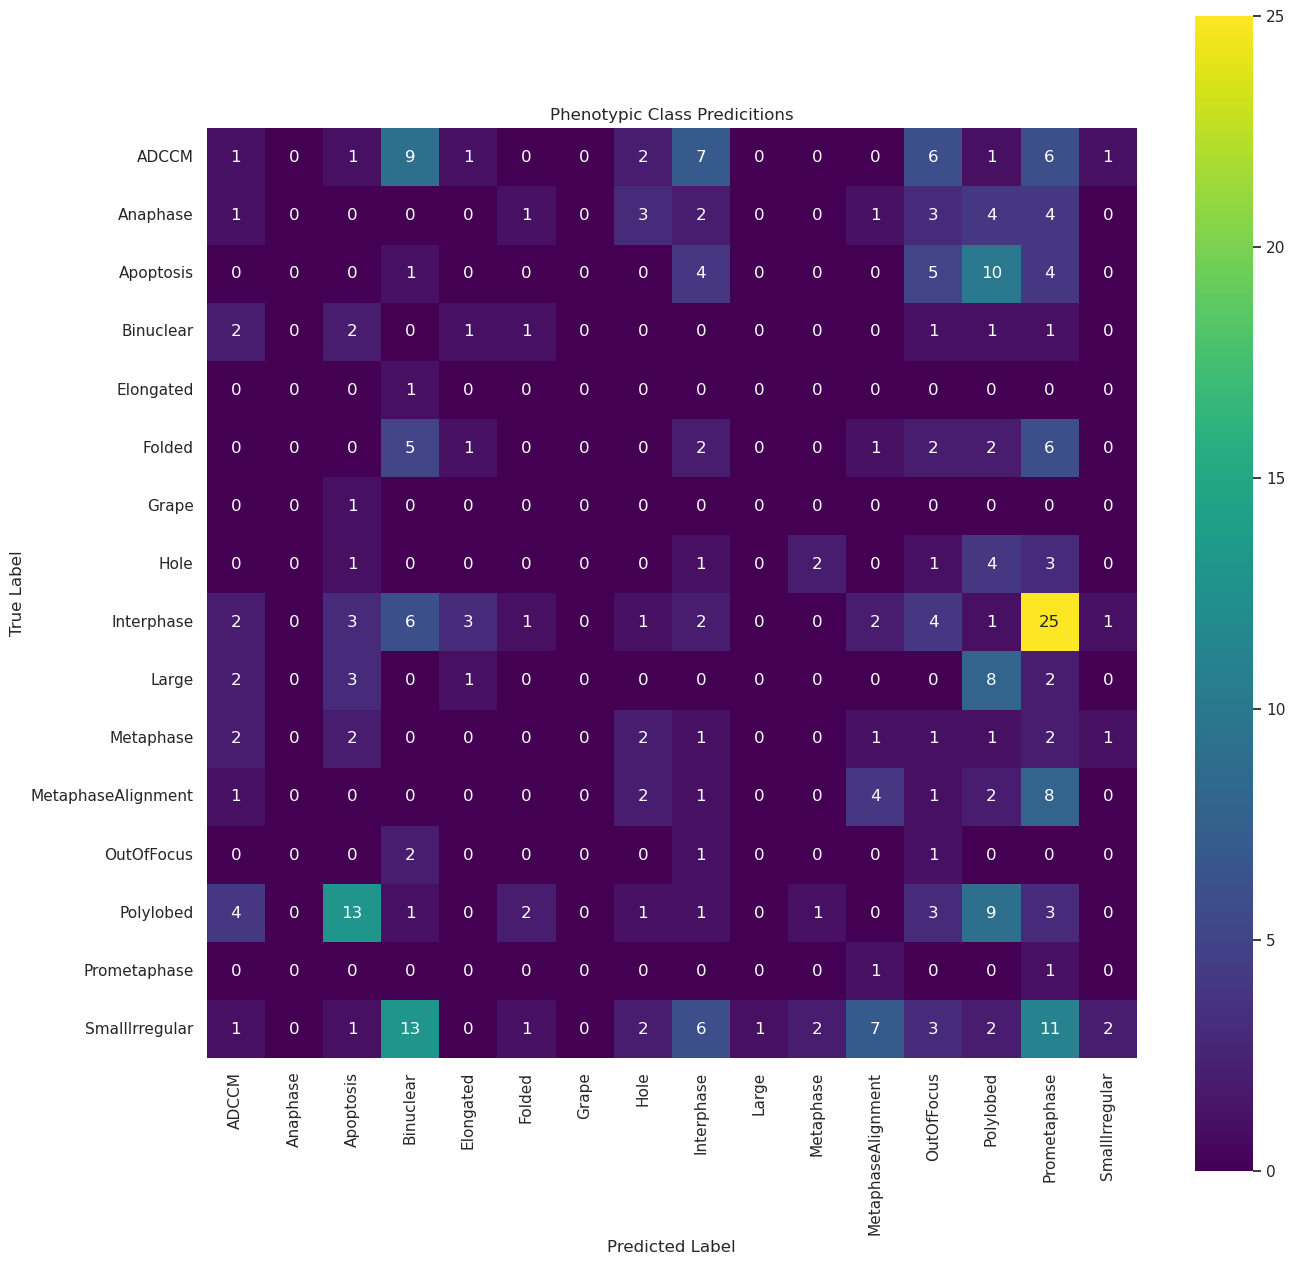

In [19]:
y_holdout, y_holdout_pred = evaluate_model_cm(shuffled_baseline_log_reg_model, holdout_data)

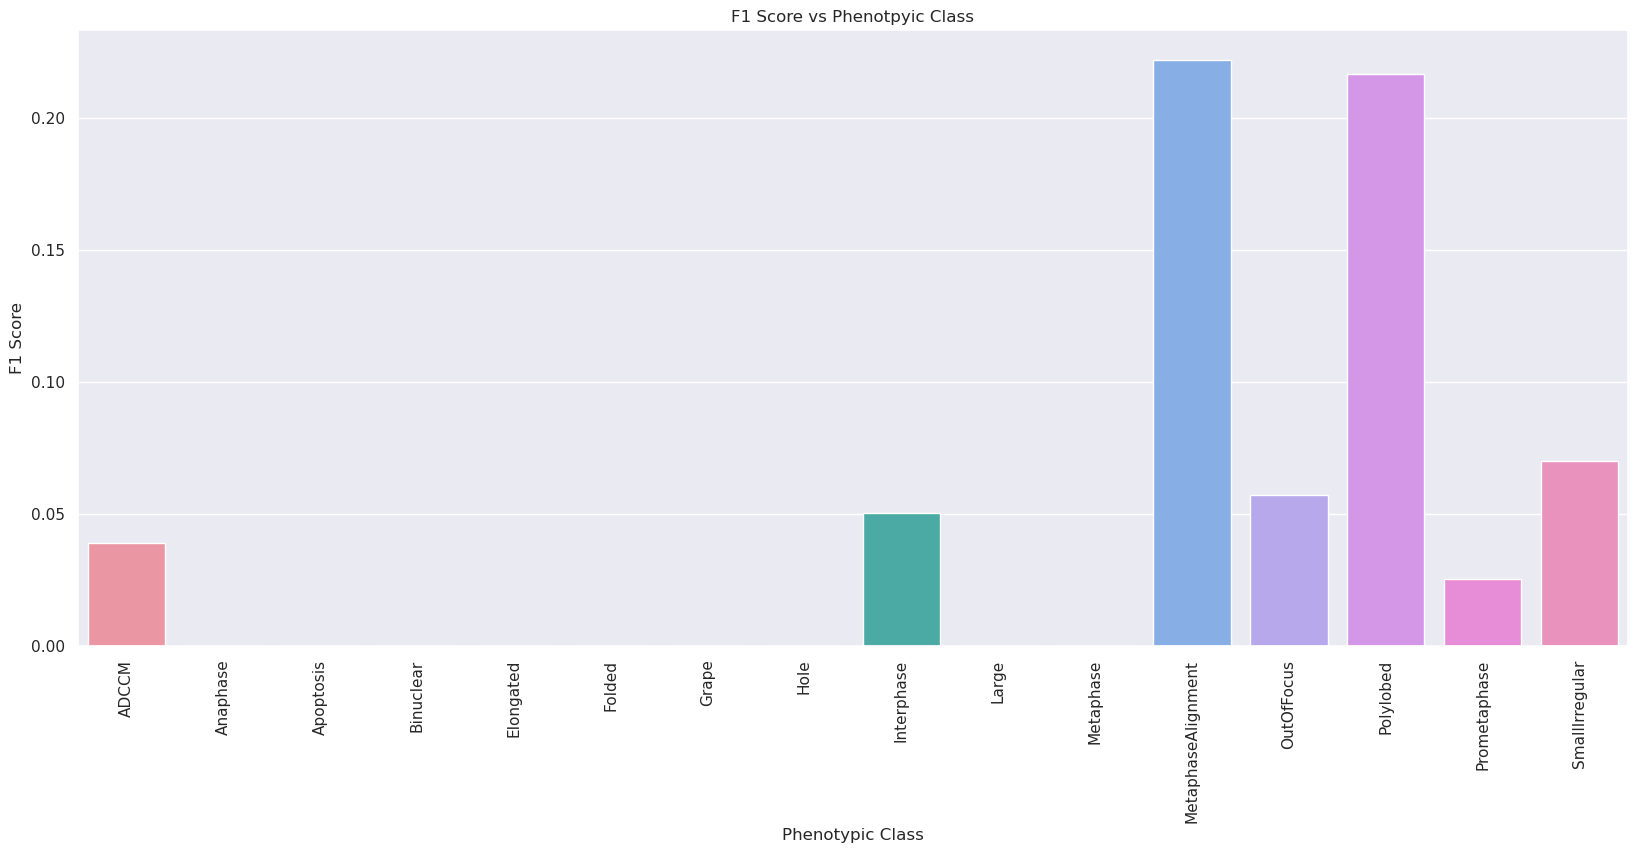

In [20]:
evaluate_model_score(shuffled_baseline_log_reg_model, holdout_data)

### Save trained model predicitions

In [21]:
predictions = []

predictions.append(y_train)
predictions.append(y_train_pred)

predictions.append(y_test)
predictions.append(y_test_pred)

predictions.append(y_holdout)
predictions.append(y_holdout_pred)

predictions = pd.DataFrame(predictions)
predictions.index = ["y_train", "y_train_pred", "y_test", "y_test_pred", "y_holdout", "y_holdout_pred"]
predictions.to_csv(f"{results_dir}/shuffled_baseline_model_predictions.tsv", sep="\t")